# Python Project

In [1]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests, time
import plotly

In [2]:
# analize each thirds
# proportions for small, med and big delays

In [49]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('airport_data.csv')
print(df.shape)
df.head()

(6489062, 33)


,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0.0,0,0800-0859,258.0,2,NaN,NaN,NaN,NaN,NaN,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0.0,0,0700-0759,1747.0,7,NaN,NaN,NaN,NaN,NaN,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0.0,0,0600-0659,1747.0,7,NaN,NaN,NaN,NaN,NaN,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0.0,0,0600-0659,2248.0,9,NaN,NaN,NaN,NaN,NaN,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0.0,0,0001-0559,1514.0,7,NaN,NaN,NaN,NaN,NaN,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [50]:
df.isnull().sum().reset_index().head(32)

,index,0
0,MONTH,0
1,DAY_OF_WEEK,0
2,DEP_DELAY_NEW,0
3,DEP_DEL15,0
4,DEP_TIME_BLK,0
5,DISTANCE,0
6,DISTANCE_GROUP,0
7,CARRIER_DELAY,5242063
8,WEATHER_DELAY,5242063
9,NAS_DELAY,5242063


In [51]:
# Delay Flags ranges

cd = df[df['CARRIER_DELAY']>0].CARRIER_DELAY
wd = df[df['WEATHER_DELAY']>0].WEATHER_DELAY
nd = df[df['NAS_DELAY']>0].NAS_DELAY
sd = df[df['SECURITY_DELAY']>0].SECURITY_DELAY
ld = df[df['LATE_AIRCRAFT_DELAY']>0].LATE_AIRCRAFT_DELAY

print(f'Carrier Delay min:{cd.min()} max:{cd.max()}')
print(f'Weather Delay min:{wd.min()} max:{wd.max()}')
print(f'NAS Delay min:{nd.min()} max:{nd.max()}')
print(f'Security Delay min:{sd.min()} max:{sd.max()}')
print(f'Late Aircraft Delay min:{ld.min()} max:{ld.max()}')

Carrier Delay min:1.0 max:2695.0
Weather Delay min:1.0 max:1575.0
NAS Delay min:1.0 max:1711.0
Security Delay min:1.0 max:1078.0
Late Aircraft Delay min:1.0 max:2010.0


In [52]:
df.loc[df['CARRIER_DELAY']>0, 'CARRIER_DELAY'] = 1
df.loc[df['WEATHER_DELAY']>0, 'WEATHER_DELAY'] = 1
df.loc[df['NAS_DELAY']>0, 'NAS_DELAY'] = 1
df.loc[df['SECURITY_DELAY']>0, 'SECURITY_DELAY'] = 1
df.loc[df['LATE_AIRCRAFT_DELAY']>0, 'LATE_AIRCRAFT_DELAY'] = 1

df.loc[df['DEP_DEL15']==0, 'CARRIER_DELAY'] = 0
df.loc[df['DEP_DEL15']==0, 'WEATHER_DELAY'] = 0
df.loc[df['DEP_DEL15']==0, 'NAS_DELAY'] = 0
df.loc[df['DEP_DEL15']==0, 'SECURITY_DELAY'] = 0
df.loc[df['DEP_DEL15']==0, 'LATE_AIRCRAFT_DELAY'] = 0

In [86]:
for delay in ['CARRIER_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']:
    df.loc[(df[delay] == 1) & (df['DEP_DELAY_NEW'] >= 15), f'SIZE_{delay}'] = f'SMALL_{delay}'
    df.loc[(df[delay] == 1) & (df['DEP_DELAY_NEW'] > 30), f'SIZE_{delay}'] = f'MEDIUM_{delay}'
    df.loc[(df[delay] == 1) & (df['DEP_DELAY_NEW'] > 60), f'SIZE_{delay}'] = f'BIG_{delay}'

    df.loc[(df[f'SIZE_{delay}'].isna()) & (df['DEP_DEL15']==0), f'SIZE_{delay}'] = 'NO_DELAY'

df.loc[df['DEP_DELAY_NEW'] < 15, f'SIZE_DELAY'] = f'NO_DELAY'
df.loc[df['DEP_DELAY_NEW'] >= 15, f'SIZE_DELAY'] = f'SMALL_DELAY'
df.loc[df['DEP_DELAY_NEW'] > 30, f'SIZE_DELAY'] = f'MEDIUM_DELAY'
df.loc[df['DEP_DELAY_NEW'] > 60, f'SIZE_DELAY'] = f'BIG_DELAY'

In [85]:
df = pd.get_dummies(df, columns=['SIZE_CARRIER_DELAY'])
df = pd.get_dummies(df, columns=['SIZE_WEATHER_DELAY'])
df = pd.get_dummies(df, columns=['SIZE_LATE_AIRCRAFT_DELAY'])

df = df.fillna(0)

In [56]:
df[df['DEP_DEL15']==1].describe()

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_NO_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_NO_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_NO_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY
count,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06,1.227368e+06,1.227368e+06,1227368.0,1.227368e+06
mean,6.473086e+00,3.934775e+00,6.841584e+01,1.0,8.579677e+02,3.901447e+00,4.521586e-01,5.242275e-02,3.277509e-01,2.700901e-03,4.916618e-01,3.474653e+00,2.823882e+01,1.348790e+02,1.317401e+04,6.321175e+04,3.579936e+03,1.645376e+06,7.828103e+06,9.715877e-05,1.339499e-04,1.162142e+01,3.671139e+01,-9.325033e+01,1.607532e-01,6.451472e-02,1.309154e-01,7.112888e+01,8.721881e+00,1.854603e-01,1.582476e-01,0.0,1.084508e-01,2.879414e-02,1.459790e-02,0.0,9.030706e-03,2.223465e-01,1.709601e-01,0.0,9.835518e-02
std,3.329377e+00,1.992616e+00,8.684447e+01,0.0,6.034997e+02,2.379533e+00,4.977061e-01,2.228781e-01,4.693937e-01,5.189999e-02,4.999307e-01,1.771501e+00,2.129837e+01,4.648374e+01,8.731558e+03,3.510032e+04,4.094565e+03,1.095574e+06,5.043405e+06,8.588854e-05,4.811397e-05,6.765633e+00,5.250422e+00,1.681165e+01,4.325139e-01,4.883145e-01,8.562936e-01,1.924260e+01,3.778255e+00,3.886707e-01,3.649731e-01,0.0,3.109490e-01,1.672276e-01,1.199367e-01,0.0,9.460000e-02,4.158229e-01,3.764743e-01,0.0,2.977944e-01
min,1.000000e+00,1.000000e+00,1.500000e+01,1.0,6.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,7.047600e+04,4.737940e+05,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,4.000000e+00,2.000000e+00,2.400000e+01,1.0,4.060000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.100000e+01,9.900000e+01,5.847000e+03,2.488600e+04,7.250000e+02,7.325950e+05,2.688839e+06,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.048800e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,6.040000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,6.000000e+00,4.000000e+00,4.100000e+01,1.0,7.110000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.196500e+04,7.047300e+04,2.566000e+03,1.581456e+06,8.501631e+06,6.178236e-05,1.238227e-04,1.200000e+01,3.761900e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.500000e+01,8.050000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
75%,9.000000e+00,6.000000e+00,8.000000e+01,1.0,1.089000e+03,5.000000e+00,1.

## Delays by Type

In [57]:
# What is the percentage of delays?

df.DEP_DEL15.value_counts(normalize=True)

0    0.810856
1    0.189144
Name: DEP_DEL15, dtype: float64

In [58]:
# How are those delays distributed through causes?

print(df[df['DEP_DEL15']>0].CARRIER_DELAY.value_counts(normalize=True))
print(df[df['DEP_DEL15']>0].WEATHER_DELAY.value_counts(normalize=True))
print(df[df['DEP_DEL15']>0].NAS_DELAY.value_counts(normalize=True))
print(df[df['DEP_DEL15']>0].SECURITY_DELAY.value_counts(normalize=True))
print(df[df['DEP_DEL15']>0].LATE_AIRCRAFT_DELAY.value_counts(normalize=True))

# There can be more than one flag for a delay

0.0    0.547841
1.0    0.452159
Name: CARRIER_DELAY, dtype: float64
0.0    0.947577
1.0    0.052423
Name: WEATHER_DELAY, dtype: float64
0.0    0.672249
1.0    0.327751
Name: NAS_DELAY, dtype: float64
0.0    0.997299
1.0    0.002701
Name: SECURITY_DELAY, dtype: float64
0.0    0.508338
1.0    0.491662
Name: LATE_AIRCRAFT_DELAY, dtype: float64


In [60]:
df[(~df['SIZE_CARRIER_DELAY'].isna()) & (df['SIZE_CARRIER_DELAY']!='NO_DELAY')].SIZE_CARRIER_DELAY.value_counts(normalize=True)

BIG_CARRIER_DELAY       0.410166
MEDIUM_CARRIER_DELAY    0.349982
SMALL_CARRIER_DELAY     0.239851
Name: SIZE_CARRIER_DELAY, dtype: float64

In [61]:
df[(~df['SIZE_WEATHER_DELAY'].isna()) & (df['SIZE_WEATHER_DELAY']!='NO_DELAY')].SIZE_WEATHER_DELAY.value_counts(normalize=True)

BIG_WEATHER_DELAY       0.549268
MEDIUM_WEATHER_DELAY    0.278465
SMALL_WEATHER_DELAY     0.172267
Name: SIZE_WEATHER_DELAY, dtype: float64

In [63]:
df[(~df['SIZE_LATE_AIRCRAFT_DELAY'].isna()) & (df['SIZE_LATE_AIRCRAFT_DELAY']!='NO_DELAY')].SIZE_LATE_AIRCRAFT_DELAY.value_counts(normalize=True)

BIG_LATE_AIRCRAFT_DELAY       0.452235
MEDIUM_LATE_AIRCRAFT_DELAY    0.347719
SMALL_LATE_AIRCRAFT_DELAY     0.200046
Name: SIZE_LATE_AIRCRAFT_DELAY, dtype: float64

(0.0, 300.0)

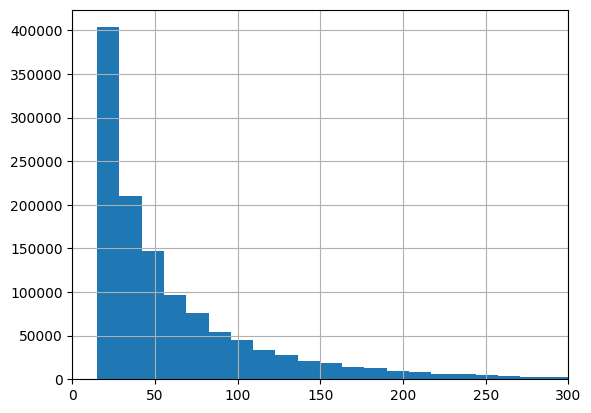

In [64]:
df[(df['DEP_DEL15']==1)].DEP_DELAY_NEW.hist(bins=200)
plt.xlim(0,300)

In [13]:
df.DEP_TIME_BLK.value_counts().sort_values
df.loc[(df['DEP_TIME_BLK']=='0600-0659') | (df['DEP_TIME_BLK']=='0800-0859'), 'DEP_TIME_BLK'] = '0600-0859'
df.loc[(df['DEP_TIME_BLK']=='0900-0959') | (df['DEP_TIME_BLK']=='1000-1059'), 'DEP_TIME_BLK'] = '0900-1059'
df.loc[(df['DEP_TIME_BLK']=='1100-1159') | (df['DEP_TIME_BLK']=='1200-1259'), 'DEP_TIME_BLK'] = '1100-1259'
df.loc[(df['DEP_TIME_BLK']=='1300-1359') | (df['DEP_TIME_BLK']=='1400-1459'), 'DEP_TIME_BLK'] = '1300-1459'
df.loc[(df['DEP_TIME_BLK']=='1500-1559') | (df['DEP_TIME_BLK']=='1600-1659'), 'DEP_TIME_BLK'] = '1500-1659'
df.loc[(df['DEP_TIME_BLK']=='1700-1759') | (df['DEP_TIME_BLK']=='1800-1859'), 'DEP_TIME_BLK'] = '1700-1859'
df.loc[(df['DEP_TIME_BLK']=='1900-1959') | (df['DEP_TIME_BLK']=='2000-2059'), 'DEP_TIME_BLK'] = '1900-2059'
df.loc[(df['DEP_TIME_BLK']=='2100-2159') | (df['DEP_TIME_BLK']=='2300-2359'), 'DEP_TIME_BLK'] = '2100-2359'
df.DEP_TIME_BLK.value_counts().sort_values

<bound method Series.sort_values of 0600-0859    882795
0900-1059    793863
1100-1259    792893
1700-1859    783744
1500-1659    756704
1300-1459    728981
1900-2059    700288
0700-0759    436032
2100-2359    271953
2200-2259    193229
0001-0559    148580
Name: DEP_TIME_BLK, dtype: int64>

In [26]:
df

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,SIZE_DELAY,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY,SIZE_CARRIER_DELAY,SIZE_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY
0,1,7,0.0,0,0600-0859,2,0.0,0.0,0.0,0.0,0.0,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,7,0.0,0,0700-0759,7,0.0,0.0,0.0,0.0,0.0,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,7,0.0,0,0600-0859,7,0.0,0.0,0.0,0.0,0.0,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
3,1,7,0.0,0,0600-0859,9,0.0,0.0,0.0,0.0,0.0,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,7,0.0,0,0001-0559,7,0.0,0.0,0.0,0.0,0.0,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.080,-115.152,NONE,0.00,0.0,0.0,65.0,2.91,NO_DELAY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489057,12,7,0.0,0,2100-2359,1,0.0,0.0,0.0,0.0,0.0,11,3,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6489058,12,7,0.0,0,1700-1859,1,0.0,0.0,0.0,0.0,0.0,11,2,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,16,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6489059,12,7,0.0,0,1900-2059,1,0.0,0.0,0.0,0.0,0.0,11,2,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6489060,12,7,0.0,0,2100-2359,1,0.0,0.0,0.0,0.0,0.0,12,3,123,Hawaiian Airlines Inc.,1318,7268,757,133573,905990,0.000120,0.000198,18,Lihue Airport,21.979,-159.346,Honolulu International,0.06,0.0,0.0,84.0,15.21,NO_DELAY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


<AxesSubplot: xlabel='DISTANCE', ylabel='Density'>

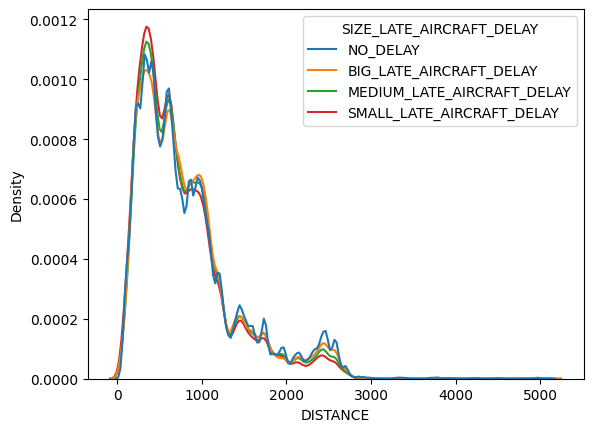

In [65]:
sns.kdeplot(
    df, x="DISTANCE", hue="SIZE_LATE_AIRCRAFT_DELAY", common_norm=False,
)

<AxesSubplot: xlabel='AWND', ylabel='Density'>

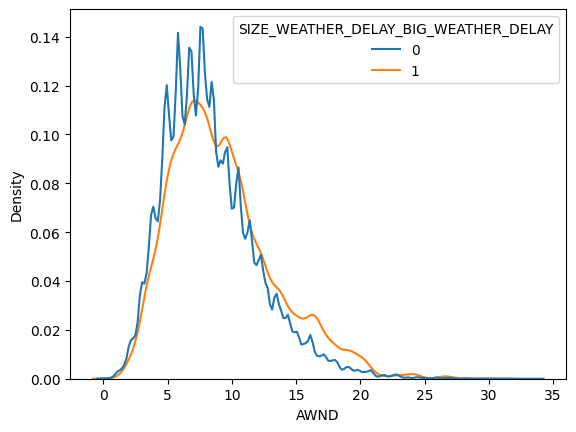

In [40]:
sns.kdeplot(
    df, x="AWND", hue="SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY", common_norm=False,
)

## Airlines analysis

In [89]:
df[(df['CARRIER_NAME']=='Southwest Airlines Co.') & (df['DEP_DELAY_NEW']>800)]

,MONTH,DAY_OF_WEEK,DEP_DELAY_NEW,DEP_DEL15,DEP_TIME_BLK,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,SIZE_DELAY,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_NO_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_NO_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_NO_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY,SIZE_CARRIER_DELAY_BIG_CARRIER_DELAY,SIZE_CARRIER_DELAY_MEDIUM_CARRIER_DELAY,SIZE_CARRIER_DELAY_NO_DELAY,SIZE_CARRIER_DELAY_SMALL_CARRIER_DELAY,SIZE_WEATHER_DELAY_BIG_WEATHER_DELAY,SIZE_WEATHER_DELAY_MEDIUM_WEATHER_DELAY,SIZE_WEATHER_DELAY_NO_DELAY,SIZE_WEATHER_DELAY_SMALL_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY_BIG_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_MEDIUM_LATE_AIRCRAFT_DELAY,SIZE_LATE_AIRCRAFT_DELAY_NO_DELAY,SIZE_LATE_AIRCRAFT_DELAY_SMALL_LATE_AIRCRAFT_DELAY,SIZE_CARRIER_DELAY,SIZE_WEATHER_DELAY,SIZE_LATE_AIRCRAFT_DELAY
1828038,4,4,804.0,1,0600-0659,936.0,4,0.0,1.0,1.0,0.0,0.0,3,16,175,Southwest Airlines Co.,12902,110752,679,1581456,13382999,0.000062,0.000099,3,Minneapolis-St Paul International,44.886,-93.218,Chicago Midway International,0.0,0.0,0.0,81.0,13.87,BIG_DELAY,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,BIG_WEATHER_DELAY,NaN


In [94]:
df.CARRIER_NAME.nunique()

17

In [90]:
rank_df = df.groupby(['SIZE_DELAY']).CARRIER_NAME.value_counts(normalize=True).rename('Percentages').reset_index()

rank_df['rank'] = rank_df.sort_values(['Percentages'], ascending=[False]) \
             .groupby(['SIZE_DELAY']) \
             .cumcount() + 1

rank_df.head(60)

,SIZE_DELAY,CARRIER_NAME,Percentages,rank
0,BIG_DELAY,Southwest Airlines Co.,0.150131,1
1,BIG_DELAY,American Airlines Inc.,0.146930,2
2,BIG_DELAY,United Air Lines Inc.,0.115083,3
3,BIG_DELAY,SkyWest Airlines Inc.,0.104921,4
4,BIG_DELAY,Delta Air Lines Inc.,0.099582,5
5,BIG_DELAY,JetBlue Airways,0.070158,6
6,BIG_DELAY,"Midwest Airline, Inc.",0.047078,7
7,BIG_DELAY,Comair Inc.,0.038762,8
8,BIG_DELAY,Mesa Airlines Inc.,0.037064,9
9,BIG_DELAY,Endeavor Air Inc.,0.036201,10


In [106]:
df_dumbbell_airlines = df.groupby(['CARRIER_NAME']).SIZE_DELAY.value_counts(normalize=True).rename('Percentages').reset_index()\
    .sort_values(by=['CARRIER_NAME', 'Percentages'], ascending=[True,False])

df_dumbbell_airlines = df_dumbbell_airlines[df_dumbbell_airlines['SIZE_DELAY']!='NO_DELAY']

df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'SMALL_DELAY', 'size_number'] = 1
df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'MEDIUM_DELAY', 'size_number'] = 3
df_dumbbell_airlines.loc[df_dumbbell_airlines['SIZE_DELAY'] == 'BIG_DELAY', 'size_number'] = 10

In [116]:
fig = px.scatter(df_dumbbell_airlines, x="Percentages", y="CARRIER_NAME", color="SIZE_DELAY", size='size_number', \
    category_orders={ 
        "SIZE_DELAY": ['SMALL_DELAY', 'MEDIUM_DELAY', 'BIG_DELAY'], \
        "CARRIER_NAME": df_dumbbell_airlines[df_dumbbell_airlines['SIZE_DELAY']=='BIG_DELAY'].sort_values(by='Percentages').CARRIER_NAME.unique()
        },
height=800)

for i in df_dumbbell_airlines["CARRIER_NAME"].unique():

    df_sub = df_dumbbell_airlines[df_dumbbell_airlines["CARRIER_NAME"] == i]
    
    fig.add_shape(
        type="line",
        layer="below",

        y0=df_sub.CARRIER_NAME.values[0], x0=df_sub.Percentages.values[0],
        y1=df_sub.CARRIER_NAME.values[1], x1=df_sub.Percentages.values[1], 
    )
fig.show()